<a href="https://colab.research.google.com/github/NiloyNxt/imported_from_colab/blob/master/cnn_layers_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.optimizers import Adam

from warnings import filterwarnings
filterwarnings('ignore')

Using TensorFlow backend.


In [2]:
from google.colab import files
files.upload()

Saving dogcat_model_bak.h5 to dogcat_model_bak.h5


In [3]:
classifier = Sequential()
classifier.add(Conv2D(32,(3,3),input_shape=(64,64,3),activation = 'relu'))
classifier.add(MaxPooling2D(pool_size=(2,2),strides=2)) #if stride not given it equal to pool filter size
classifier.add(Conv2D(32,(3,3),activation = 'relu'))
classifier.add(MaxPooling2D(pool_size=(2,2),strides=2))
classifier.add(Flatten())
classifier.add(Dense(units=128,activation='relu'))
classifier.add(Dense(units=1,activation='sigmoid'))

from keras.models import load_model

classifier.load_weights('dogcat_model_bak.h5')

classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               802944    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                

In [4]:
files.upload()


Saving cats_and_excessive_meowing.jpg to cats_and_excessive_meowing.jpg


{'cats_and_excessive_meowing.jpg': b'\xff\xd8\xff\xe1\x00\x18Exif\x00\x00II*\x00\x08\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xff\xec\x00\x11Ducky\x00\x01\x00\x04\x00\x00\x00W\x00\x00\xff\xe1\x04Xhttp://ns.adobe.com/xap/1.0/\x00<?xpacket begin="\xef\xbb\xbf" id="W5M0MpCehiHzreSzNTczkc9d"?> <x:xmpmeta xmlns:x="adobe:ns:meta/" x:xmptk="Adobe XMP Core 5.6-c145 79.163499, 2018/08/13-16:40:22        "> <rdf:RDF xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#"> <rdf:Description rdf:about="" xmlns:xmpMM="http://ns.adobe.com/xap/1.0/mm/" xmlns:stRef="http://ns.adobe.com/xap/1.0/sType/ResourceRef#" xmlns:xmp="http://ns.adobe.com/xap/1.0/" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:photoshop="http://ns.adobe.com/photoshop/1.0/" xmpMM:DocumentID="xmp.did:B41ECA05C29B11E980868988A526EDF3" xmpMM:InstanceID="xmp.iid:B41ECA04C29B11E980868988A526EDF3" xmp:CreatorTool="Adobe Photoshop CC 2019 (Macintosh)" photoshop:AuthorsPosition="Contributor"> <xmpMM:DerivedFrom stRef:instanceID="AB9

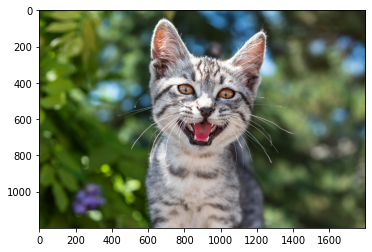

In [6]:
from keras_preprocessing import image
from matplotlib import pyplot as plt
import numpy as np
img_path = 'cats_and_excessive_meowing.jpg'

img1 = image.load_img(img_path)
plt.imshow(img1)


In [9]:
img1 = image.load_img(img_path, target_size=(64, 64))
img = image.img_to_array(img1)
img = img/255
img = np.expand_dims(img, axis=0)

classifier.predict(img)

array([[1.]], dtype=float32)

In [10]:
model_layers = [ layer.name for layer in classifier.layers]
print('layer name : ',model_layers)

layer name :  ['conv2d_1', 'max_pooling2d_1', 'conv2d_2', 'max_pooling2d_2', 'flatten_1', 'dense_1', 'dense_2']


In [0]:
from keras.models import Model

conv2d_11_output = Model(inputs=classifier.input, outputs=classifier.get_layer('conv2d_1').output)
max_pooling2d_11_output = Model(inputs=classifier.input, outputs=classifier.get_layer('max_pooling2d_1').output)
conv2d_12_output = Model(inputs=classifier.input,outputs=classifier.get_layer('conv2d_2').output)
max_pooling2d_12_output = Model(inputs=classifier.input, outputs=classifier.get_layer('max_pooling2d_2').output)

In [15]:
conv2d_11_features = conv2d_11_output.predict(img)
conv2d_12_features = conv2d_12_output.predict(img)
print('1st conv layer feature output shape : ',conv2d_11_features.shape)
print('2nd conv layer feature output shape : ',conv2d_12_features.shape)


max_pool_11_featues = max_pooling2d_11_output.predict(img)
max_pool_12_featues = max_pooling2d_12_output.predict(img)
print('1st max pool layer feature output shape:', max_pool_11_featues.shape)
print('2nd max pool layer feature output shape:', max_pool_12_featues.shape)

1st conv layer feature output shape :  (1, 62, 62, 32)
2nd conv layer feature output shape :  (1, 29, 29, 32)
1st max pool layer feature output shape: (1, 31, 31, 32)
2nd max pool layer feature output shape: (1, 14, 14, 32)


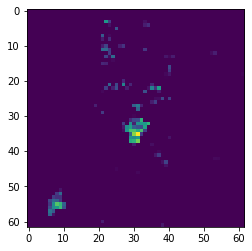

In [16]:
plt.imshow(conv2d_11_features[0, :, :, 4])

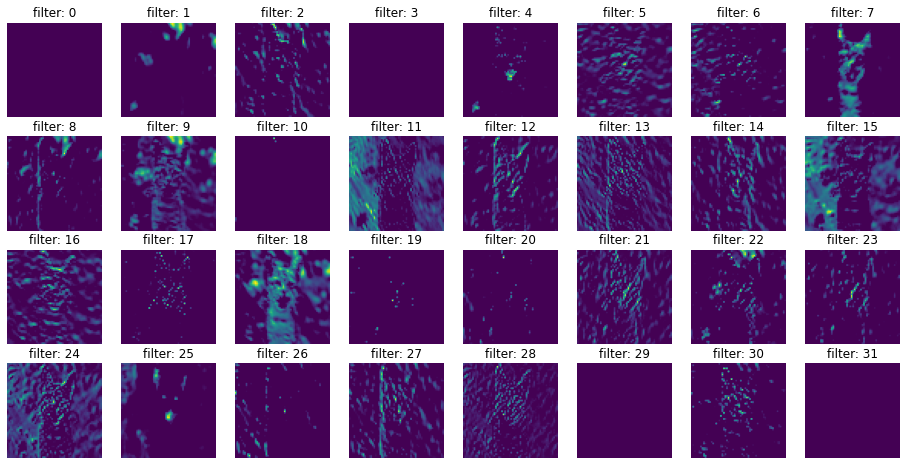

In [17]:
fig = plt.figure(figsize=(16,8))
columns = 8
rows = 4
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter: ' + str(i))
    plt.imshow(conv2d_11_features[0, :, :, i])
plt.show()

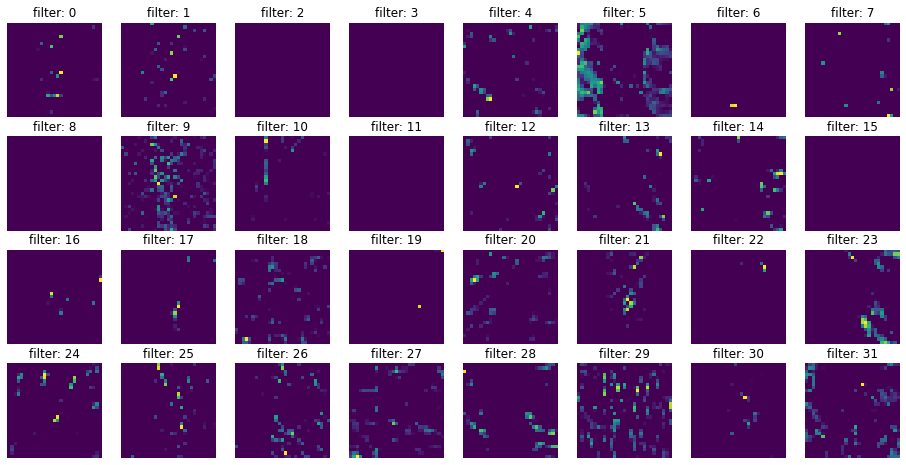

In [18]:
fig = plt.figure(figsize=(16,8))
columns = 8
rows = 4
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter: ' + str(i))
    plt.imshow(conv2d_12_features[0, :, :, i])
plt.show()

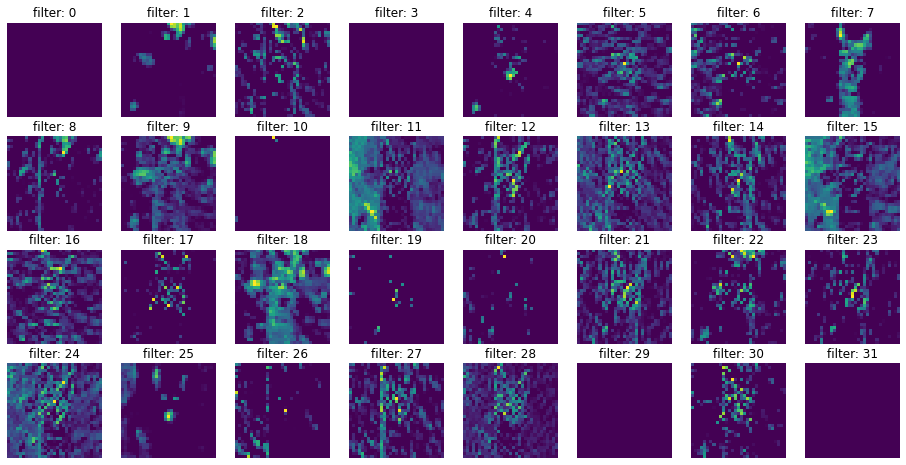

In [19]:
fig = plt.figure(figsize=(16,8))
columns = 8
rows = 4
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter: ' + str(i))
    plt.imshow(max_pool_11_featues[0, :, :, i])
plt.show()

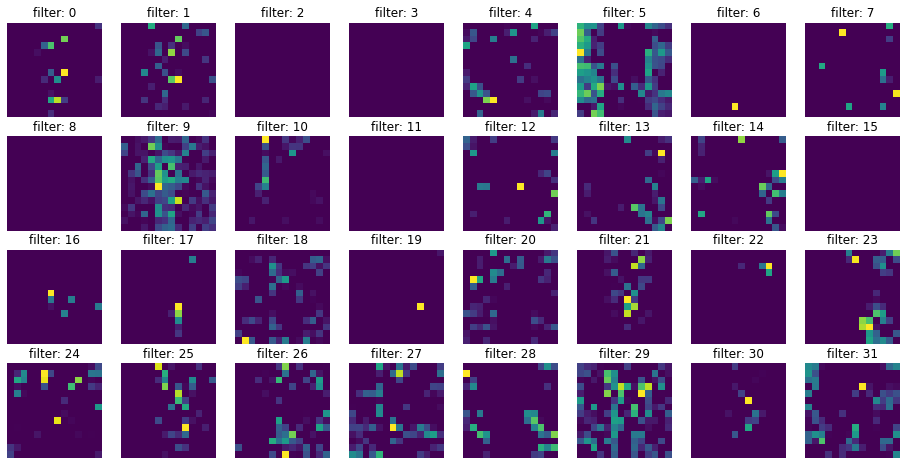

In [20]:
fig = plt.figure(figsize=(16,8))
columns = 8
rows = 4
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter: ' + str(i))
    plt.imshow(max_pool_12_featues[0, :, :, i])
plt.show()

In [22]:
dense_11_output = Model(inputs=classifier.input, outputs=classifier.get_layer('dense_1').output)
dense_11_featues = dense_11_output.predict(img)
print('dense_11_feature_shape', dense_11_featues.shape)

dense_11_feature_shape (1, 128)


In [23]:

print(dense_11_featues[0].flatten())

[ 0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.        15.748824
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         6.95476    0.         0.
  0.         0.         0.         0.        22.289078  15.570942
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.        23.013628   0.        10.6503525
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.        55.21046    0.         0.         0.         0.
  6.23083    0.         0.         0.         0.         0.
  0.         0.         0.        20.093538   0.         0.
  0.         0.         0.         0.         0.         0.
  0.        18.869669